# Práctica Final
## *Machine Learning*
### 14 Junio 2022


1.   Marta Jimenez Menendez
2.   Isabel Marsa Martin
3.   Juan Sevilla Fernandez



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from tabulate import tabulate
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm
from matplotlib.pyplot import figure
from sklearn.neighbors import NearestNeighbors
import xgboost as xgb 



random_num = 100
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#data = pd.read_csv('airbnb-listings-extract.csv', sep = ';')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airbnb-listings-extract.csv', sep = ';')

### Análisis Descriptivo

El primer paso para resolver esta práctica será realizar un pequeño análisis descriptivo de la base de datos junto con la limpieza de la misma. Es una base de datos que no ha sido limpiada previamente por lo que nos centraremos en eliminar todas aquellas columnas que no nos aporten información necesaria, tratar los valores nulos, tratar la variable objetivo y cambiar el tipo de variables cuando sea necesario. 

Para mayor facilidad, cambiaremos el nombre de las columnas para sustituir el espacio por '_' 

In [4]:
data.columns = data.columns.str.replace(' ', '_')

Uno de los primeros pasos será quedarnos solo con las viviendas de Madrid. Esto lo hacemos porque la gran mayoría de viviendas están en este mercado y la localización por ciudades va a sesgar el precio en gran medida cuando nos queremos centrar en la calidad principalmente. 

In [5]:
data = data.loc[data.Market == 'Madrid']
data = data.drop(columns ='Market')

In [6]:
data.shape

(13274, 88)

A continuación analizaremos la **variable objetivo**, el precio:

In [7]:
print('Total de datos missing en la variable Precio:', data['Price'].isnull().sum())

Total de datos missing en la variable Precio: 9


Como solo hay 9 observaciones entre 13,274 cuyo precio es desconocido, optaremos por eliminarlas. No las sustituiremos pues es un número muy pequeño de NAs no significativo en la muestra final:

In [8]:
data = data[data['Price'].notna()]

In [9]:
data['Price'].describe()

count    13265.000000
mean        67.430833
std         61.784819
min          9.000000
25%         30.000000
50%         52.000000
75%         80.000000
max        875.000000
Name: Price, dtype: float64

Como podemos observar, el precio mínimo por noche está en 9€ y el máximo en 875€. La media y la mediana están algo alejadas la una de la otra (67 y 52) esto nos indica que la muestra probablemente presenta algunos valores atípicos con precios excesivamente altos. 

A continuación analizaremos los datos **missing**:

In [10]:
pd.set_option('display.max_rows', None)

pd.DataFrame({'Number_Missing': data.isna().sum(),
              'Percent_Missing': round(data.isnull().sum() * 100 / len(data),2),
              'Type': data.dtypes}).sort_values(by = "Percent_Missing", ascending=False)

,Number_Missing,Percent_Missing,Type
Jurisdiction_Names,13265,100.00,object
Host_Acceptance_Rate,13265,100.00,object
Has_Availability,13265,100.00,object
License,13016,98.12,object
Square_Feet,12744,96.07,float64
Monthly_Price,9945,74.97,float64
Weekly_Price,9902,74.65,float64
Notes,8272,62.36,object
Security_Deposit,7635,57.56,float64
Interaction,5793,43.67,object


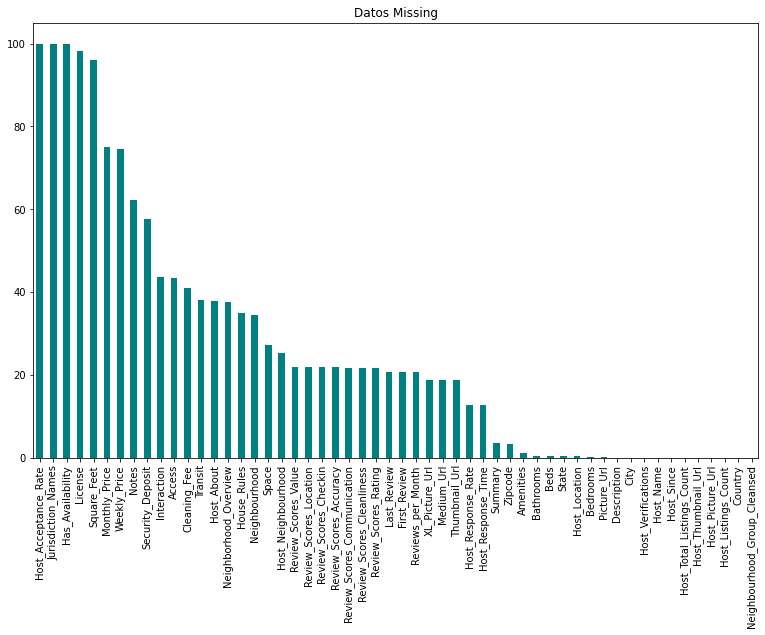

In [11]:
missing = data.isnull().mean()*100
figure(figsize = (13,8))
datos_missing =  missing[missing > 0].sort_values(ascending=False)
datos_missing.plot.bar(title = 'Datos Missing', color='teal')


En el gráfico superior se puede observar que todos los datos de las variables Jurisdiction_Names, Has_Availability y Host_Acceptance_Rate contienen son nulos. Por otro lado, las variables License y Square_Feet también contienen un número significativo de datos missing. Estas variables, por tanto, deberán ser eliminadas ya que no aportan nada a nuestro análisis. También nos desharemos de otras variables que explicaremos más adelante.

En primer lugar se eliminarán las siguientes variables:


        ⁃ Aquellas columnas que posean más de un 90% de datos missing las eliminaremos.
        ⁃ Aquellas columnas que no nos aportan ninguna información por ser únicas para cada observación.
        ⁃ Eliminaremos también aquellas variables que toman solo un valor para todas las observaciones. 
        ⁃ La variable geolocalización pues es una mezcla de las variables latitud y longitud. 
        ⁃ La variable Host_Name pues nos quedaremos solo con Host_ID.
        ⁃ Las variables Neighbourhood y Neighbourhood_Group_Cleansed y matendremos Neighbourhood_Cleansed.
        ⁃ Zipcode se descarta ya que toda la informcion posicional esta entre nombre del barrio, longitud y latitud.
        ⁃ La variable Calculated_host_listings_count, ya que es idéntica a la variable Host_Listings_Count.

In [12]:
data = data.drop(columns = ['ID', 'Listing_Url', 'Geolocation','Scrape_ID', 'Name' , 'Experiences_Offered', 'Host_Acceptance_Rate', 
                            'Square_Feet', 'License', 'Jurisdiction_Names', 'Has_Availability', 'Last_Scraped', 'Host_Name', 'City',
                            'Neighbourhood', 'Neighbourhood_Group_Cleansed', 'State', 'Country_Code', 'Country', "Zipcode", 'Calculated_host_listings_count' ])


A continuación pasaremos a examinar las columnas que tienen más datos missing para tratar de encontrar una razón y sustituir los NAs por el valor más correcto. En primer lugar observamos que tanto las columnas de precio semanal como la de precio mensual tienen un 75% de datos missing. 

Una primera hipótesis es que aquellos que tienen valores de precio semanal y mensual es porque ofrecen un descuento por estancias largas. Si esto es cierto podemos asumir que el resto no ofrecen ese descuento y sustituir los NAs por el precio multiplicado por 7 y 30 respectivamente. 

In [13]:
p = data[['Price', 'Weekly_Price', 'Monthly_Price']].dropna()
p['Weekly_Price'] = p['Weekly_Price']/7
p['Monthly_Price'] = p['Monthly_Price']/30
p['Weekly_Discount'] = ((p['Weekly_Price'] - p['Price']) <= 0)
p['Monthly_Discount'] = ((p['Monthly_Price'] - p['Price']) <= 0)

In [14]:
monthly_discount= p['Monthly_Discount'].value_counts()
weekly_discount =p['Weekly_Discount'].value_counts()

In [15]:
discount = pd.DataFrame({'Monthly Discount': monthly_discount, 
                        'Weekly Discount': weekly_discount})
discount

,Monthly Discount,Weekly Discount
True,2635,2146
False,167,656


Como podemos observar, para la gran mayoría, especialmente los de más larga estancia, la hipótesis del descuento es verdadera. Por tanto, sustituiremos el valor de estos NA por el precio diario multiplicado por 7 para el precio semanal y por 30 para el precio mensual. 

Además, para que estos precios semanales y mensuales no sesgen los algoritmos, computaremos el descuento semanal y mensual como porcentage y descartaremos las variables de precio mensual y semanal:

In [16]:
data['Weekly_Price'] = data['Weekly_Price'].fillna(data['Price']*7)
data['Monthly_Price'] = data['Monthly_Price'].fillna(data['Price']*30)

In [17]:
data['Weekly_Discount'] = ((data['Price']*7)-data['Weekly_Price'])/(data['Price']*7)
data['Monthly_Discount'] = ((data['Price']*30)-data['Monthly_Price'])/(data['Price']*30)

In [18]:
data = data.drop(columns = ['Weekly_Price', 'Monthly_Price'])


1.   La variable Notas representa aquellos comentarios adicionales que el arrendador quiere comunicar al inquilino. En caso de valor NA supondremos que viene de que el arrendador no tenga nada que añadir y sustituiremos estos valores por 'Nada'. Lo mismo haremos con las variables Summary y Description que deberían resumir el espacio.

2.   Para las variables 'Space', 'Neighborhood_Overview', 'Transit', 'Access', 'Interaction', 'Host_Location', 'Host_Neighbourhood', 'Amenities', 'Host_About', 'Host_Verifications' y 'House_Rules' que deberían aportar información adicional sobre el apartamento y el arrendador cuando exista NA lo sustituiremos por 'Sin informacion'. 

3.   Para las variables de imagen sustituiremos los NAs por 'Sin imagen' 
Para todas las variables de fecha las sustituiremos por una fecha muy antigua. Para las variables de review con missing por un número muy alejado (500). 

4.   En el caso del depósito y el el servicio de limpieza, entenderemos que si no hay valor es porque no se requiere pagar uno y sustituiremos el valor NA por 0.

5.   En el caso de Zipcode nos debería indicar el barrio en el que está localizado cada vivienda, como no hay manera de conocer qué valor le correspondería a los missing los sustituiremos todos por '0000'.

6.   Para las variables Host_Response_Time y Host_Response_Rate como no podemos saber si los Missing vienen de un tiempo de respuesta excesivamente elevado o bajo les daremos un valor muy diferente a los que hay en el dataFrame para diferenciarlos en el análisis. Lo mismo haremos para el caso de las variables baños, habitaciones y camas.

In [19]:
data['Notes'] = data['Notes'].fillna('Nada')
data['Summary'] = data['Summary'].fillna('Nada')
data['Description'] = data['Description'].fillna('Nada')

data['Space'] = data['Space'].fillna('Sin Informacion')
data['Neighborhood_Overview'] = data['Neighborhood_Overview'].fillna('Sin Informacion')
data['House_Rules'] = data['House_Rules'].fillna('Sin Informacion')
data['Interaction'] = data['Interaction'].fillna('Sin Informacion')
data['Transit'] = data['Transit'].fillna('Sin Informacion')
data['Access'] = data['Access'].fillna('Sin Informacion')
data['Host_About'] = data['Host_About'].fillna('Sin Informacion')
data['Host_Location'] = data['Host_Location'].fillna('Sin Informacion')
data['Host_Neighbourhood'] = data['Host_Neighbourhood'].fillna('Sin Informacion')
data['Amenities'] = data['Amenities'].fillna('Sin Informacion')
data['Host_Verifications'] = data['Host_Verifications'].fillna('Sin Informacion')

data['Thumbnail_Url'] = data['Thumbnail_Url'].fillna('Sin Imagen')
data['Medium_Url'] = data['Medium_Url'].fillna('Sin Imagen')
data['Picture_Url'] = data['Picture_Url'].fillna('Sin Imagen')
data['XL_Picture_Url'] = data['XL_Picture_Url'].fillna('Sin Imagen')
data['Host_Thumbnail_Url'] = data['Host_Thumbnail_Url'].fillna('Sin Imagen')
data['Host_Picture_Url'] = data['Host_Picture_Url'].fillna('Sin Imagen')

data['First_Review'] = data['First_Review'].fillna('1900-01-01')
data['Last_Review'] = data['Last_Review'].fillna('1900-01-01')
data['Host_Since'] = data['Host_Since'].fillna('1900-01-01')
data['Review_Scores_Rating'] = data['Review_Scores_Rating'].fillna(500)
data['Review_Scores_Accuracy'] = data['Review_Scores_Accuracy'].fillna(500)
data['Review_Scores_Cleanliness'] = data['Review_Scores_Cleanliness'].fillna(500)
data['Review_Scores_Checkin'] = data['Review_Scores_Checkin'].fillna(500)
data['Review_Scores_Communication'] = data['Review_Scores_Communication'].fillna(500)
data['Review_Scores_Location'] = data['Review_Scores_Location'].fillna(500)
data['Review_Scores_Value'] = data['Review_Scores_Value'].fillna(500)
data['Reviews_per_Month'] = data['Reviews_per_Month'].fillna(500)

data['Security_Deposit'] = data['Security_Deposit'].fillna(0)
data['Cleaning_Fee'] = data['Cleaning_Fee'].fillna(0)

data['Host_Response_Time'] = data['Host_Response_Time'].fillna(99)
data['Host_Response_Rate'] = data['Host_Response_Rate'].fillna(0)

data['Bathrooms'] = data['Bathrooms'].fillna(99)
data['Bedrooms'] = data['Bedrooms'].fillna(99)
data['Beds'] = data['Beds'].fillna(99)

data = data[data['Host_Listings_Count'].notna()]

A continuación nos centraremos en cambiar los tipos confundidos.

In [20]:
data_types=pd.DataFrame({'Tipo de Variable': data.select_dtypes(exclude=["float64","int64"]).dtypes})
data_types

,Tipo de Variable
Summary,object
Space,object
Description,object
Neighborhood_Overview,object
Notes,object
Transit,object
Access,object
Interaction,object
House_Rules,object
Thumbnail_Url,object


Todas aquellas variables que sean de tipo fecha las pasaremos a número de días hasta la actualidad.

Por otro lado, la variable Host_Response se puede transformar a ordinal numérica.  

In [21]:
data['First_Review'] = (pd.to_datetime("2022-05-22") - pd.to_datetime(data['First_Review'])).dt.days
data['Last_Review'] = (pd.to_datetime("2022-05-22") - pd.to_datetime(data['Last_Review'])).dt.days
data['Calendar_last_Scraped'] = (pd.to_datetime("2022-05-22") - pd.to_datetime(data['Calendar_last_Scraped'])).dt.days
data['Host_Since'] = (pd.to_datetime("2022-05-22") - pd.to_datetime(data['Host_Since'])).dt.days


In [22]:
Host_response = {"Host_Response_Time": {"within an hour": 1, "within a few hours": 2, "within a day": 3, "a few days or more": 4, 99:99}}
data=data.replace(Host_response)

Las variables Host_Neighbourhood y Neighbourhood_Cleansed tienen demasiados tipos distintos de observaciones por lo que la transformaremos de modo que si el tipo no se repite un número determinado de veces sea sustituido por "otros". 

In [23]:
data.loc[data.groupby('Host_Neighbourhood').Host_Neighbourhood.transform('count').lt(15), 'Host_Neighbourhood'] = "otros"    
data.loc[data.groupby('Neighbourhood_Cleansed').Neighbourhood_Cleansed.transform('count').lt(10), 'Neighbourhood_Cleansed'] = "otros"    

La variable calendar_updated nos indica hace cuanto hace cuanto tiempo fue actualizada la información sobre el airbnb. Esta variable es de tipo *string* pero sería de mayor uso si fuera una variable numérica. Transformaremos esta variable pasándola a *numeric* y lo haremos en meses. Antes de pasarla a numérica, remplazaremos los valores por número de meses. Para ello, quitaremos la frase de 'months ago' cuando la tenga y en el caso de que sea 'weeks ago' dividiremos el número entre 4, en el caso de que sea Days ago dividiremos el número entre 30. Cuando el dato sea 'today', lo remplazaremos por 0 y cuando sea 'never' le asignaremos el valor de 100.

In [24]:
data['Calendar_Updated'] = data['Calendar_Updated'].str.replace(' months ago', '' )
data['Calendar_Updated'] = data['Calendar_Updated'].str.replace('1 week ago', '0.25' )
data['Calendar_Updated'] = data['Calendar_Updated'].str.replace('a week ago', '0.25' )
data['Calendar_Updated'] = data['Calendar_Updated'].str.replace('2 weeks ago', '0.5' )
data['Calendar_Updated'] = data['Calendar_Updated'].str.replace('3 weeks ago',  '0.75')
data['Calendar_Updated'] = data['Calendar_Updated'].str.replace('4 weeks ago',  '1')
data['Calendar_Updated'] = data['Calendar_Updated'].str.replace('5 weeks ago',  '1.25')
data['Calendar_Updated'] = data['Calendar_Updated'].str.replace('6 weeks ago',  '1.5')
data['Calendar_Updated'] = data['Calendar_Updated'].str.replace('7 weeks ago',  '1.75')
data['Calendar_Updated'] = data['Calendar_Updated'].str.replace('today', '0' )
data['Calendar_Updated'] = data['Calendar_Updated'].str.replace('yesterday', '0.03' )
data['Calendar_Updated'] = data['Calendar_Updated'].str.replace('2 days ago', '0.06' )
data['Calendar_Updated'] = data['Calendar_Updated'].str.replace('3 days ago', '0.1' )
data['Calendar_Updated'] = data['Calendar_Updated'].str.replace('4 days ago', '0.13' )
data['Calendar_Updated'] = data['Calendar_Updated'].str.replace('5 days ago', '0.16' )
data['Calendar_Updated'] = data['Calendar_Updated'].str.replace('6 days ago', '0.2' )
data['Calendar_Updated'] = data['Calendar_Updated'].str.replace('never', '100' )


Una vez remplazados los valores, podemos transformar la variable en numérica:

In [25]:
data['Calendar_Updated'] = pd.to_numeric(data['Calendar_Updated'])

Como en esta base de datos hay muchas variables de texto con las que no tiene sentido trabajar en modelos, separaremos la base de datos en dos. Por un lado, todas aquellas variables numéricas y categóricas que puedan ser dummies y por otro lado aquellas variables de texto con las que trabajaremos posteriormente. 

In [26]:
data_num = data.drop(columns = ['Summary', 'Space', 'Description' , 'Neighborhood_Overview', 'Notes', 'Transit', 'Access', 
                                'Interaction' , 'House_Rules', 'Thumbnail_Url', 'Medium_Url', 'Picture_Url', 'XL_Picture_Url',
                               'Host_URL', 'Host_Location', 'Host_About', 'Host_Thumbnail_Url', 'Host_Picture_Url', 'Street' , 'Neighbourhood_Cleansed',
                               'Features', 'Amenities', 'Host_Verifications'])

In [27]:
data_num.shape

(13262, 44)

A continuación creamos un mapa de calor donde podemos observar de forma visual cómo se relacionan entre sí las variables del dataset:

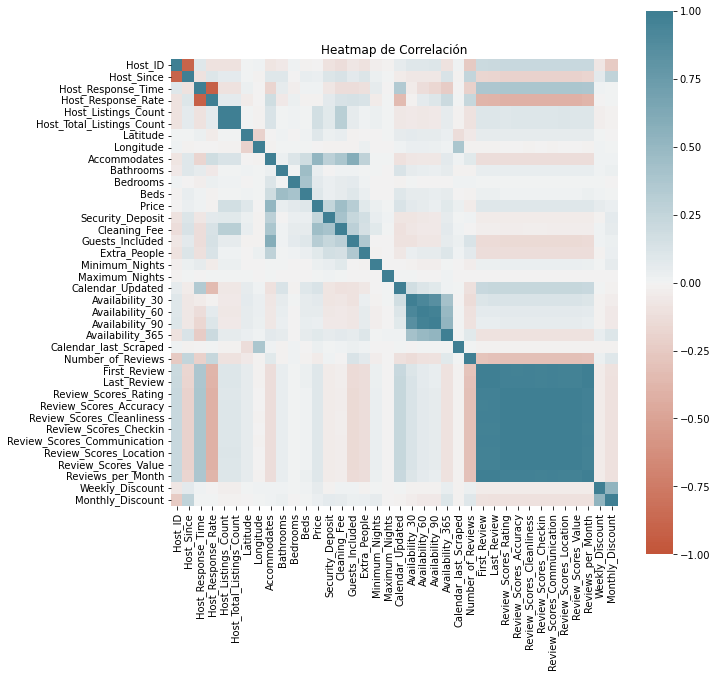

In [28]:
correlations = data_num.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
               square=True
)
ax.set(title='Heatmap de Correlación')
plt.show()

En el heatmap se puede destacar la alta correlación entre las variables relacionadas con las reseñas de los clientes. Existe una elevada correlación positiva entre las variables First_Review, Last_Review, Review_Scores_Rating, Review_Scores_Accuracy, Review_Scores_Cleanliness, Review_Scores_Checkin, Review_Scores_Location, Review_Scores_Value y Reviews_per_Month. Estos valores son redundantes ya que normalmente cuando las reseñas de un airbnb son buenas, lo son en todos sus aspectos, menos en algún caso concreto. Se puede observar también una alta correlación entre Availability_30, Availability_60 Availability_90 y Availability_365, ya que indican el número de veces que el alojamiento ha estado disponible en 30, 60, 90 y 365 días respectivamente. También destaca la correlación entre Weekly_Discount y Monthly_Discount, lo cual tiene sentido ya que cuanto más descuento ofreza por alojarse una semana, mayor descuento ofrecerá por el mes. Estas dos variables muestran una correlación casi nula con el resto de variables.
Las variables Accomodates y Guests_Included también muestran una correlación bastante elevada. Estas representan la capacidad que tiene la vivienda y el número de huéspedes que se incluyen respectivamente.

Para analizar la variable objetivo mostramos en otro mapa de calor las correlaciones entre las variables que más se correlacionan con el precio:

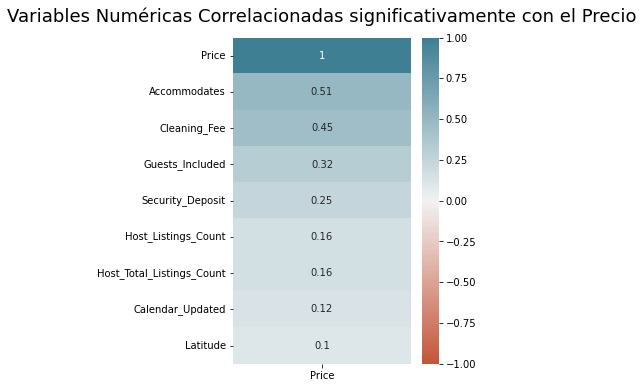

In [29]:
f, ax = plt.subplots(figsize=(4, 6))
sns.heatmap(
    correlations[['Price']].sort_values(by='Price',ascending=False)[abs(correlations['Price'])>0.1],
    vmin=-1, vmax=1,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True
    );

ax.set_title('Variables Numéricas Correlacionadas significativamente con el Precio', fontdict={'fontsize':18}, pad=16);

La variable que tiene mayor coeficiente de correlación Pearson con el precio es Accomodates. Esta variable indica el número de huéspedes que se pueden alojar en el Airbnb. Esto nos indica, que cuanto más cuanto más espacio haya para más personas, mayor será el precio aunque no de forma significativa ya que el coeficiente es de 0.51 que indica una correlación positiva moderada. Por otro lado, el precio tiene una correlación de 0.45 con la variable Cleaning_Fee, que indica la tarifa que se cobra al huésped por limpieza. Las variables Guests_Included, Security_Deposit, Host_Listings_Count, Calendar_Updated y Latitude también se correlacionan de forma positiva con el precio, pero el coeficiente que presentan es muy bajo y por tanto poco significativo.


In [30]:
data_num = pd.get_dummies(data_num)

A continuación vamos a estudiar la variable Neighbourhood_Cleansed. Veremos en qué zonas de Madrid hay más alojamientos de Airbnb disponibles y qué nivel de precios hay en cada zona. Para ello, utilizaremos las variables Longitude y Latitude que nos indican en la zona que se encuentran.

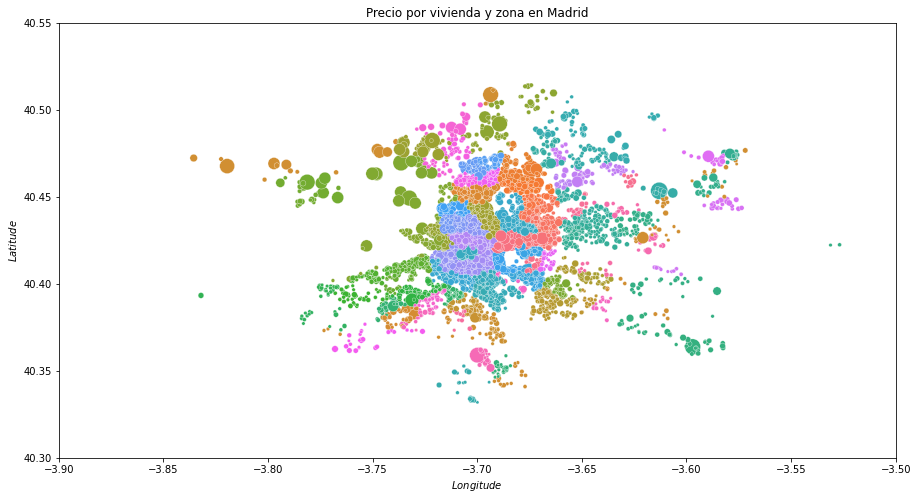

In [31]:
fig, ax = plt.subplots(figsize=(15, 8))
with sns.plotting_context("notebook", font_scale=1.5):
    sns.scatterplot(x='Longitude',
                    y='Latitude',
                    size='Price',
                    hue = 'Neighbourhood_Cleansed',
                    palette=sns.color_palette("husl", len(pd.unique(data['Neighbourhood_Cleansed']))),
                    sizes=(10, 300), 
                    data=data, 
                    ax=ax,
                    legend = False)

ax.set_xlabel(r'$Longitude$')
ax.set_ylabel(r'$Latitude$')
ax.set(ylim=(40.3,40.55), xlim=(-3.9,-3.5), title='Precio por vivienda y zona en Madrid')

plt.show()

En el gráfico superior podemos observar la cantidad de Airbnbs en cada zona y comparar el nivel de precios. Por un lado, se puede destacar que las viviendas más caras se encuentran en el noroeste de Madrid, y que hay muy poca oferta de alojamientos en esta zona. Por tanto, se puede decir que esta es una de las zonas mejor valoradas de Madrid, ya que hay poca oferta y precios elevados. En zona del centro marcada en rojo se encuentra Chamberí, donde se aprecian unos precios relativamente elevados en comparación con los precios de alrededor. El centro de Madrid es la zona que más Airbnbs tiene disponibles y puede ser por esta razón por la que los precios no son elevados, y son similares entre ellos. Por otro lado, en el sur los precios son bastante bajos por lo general menos algún caso diferente, como podemos comprobar en la zona rosa
En cada zona hay algún Airbnb cuyo precio es mucho más elevado que el resto, que corresponderán a viviendas de lujo en esas zonas y por tanto son outliers.Por ejemplo, en la zona azul en el noreste de Madrid los precios son moderados, y destaca un Airbnb con un precio que triplica al resto.


## **Principal Component Analysis (PCA)**

A continuación realizaremos un **PCA**. Esto nos ayudará no solo a reducir dimensiones en caso de que sea necesario si no a identificar la presencia de outliers

Antes de realizar el PCA, es conviniente que normalicemos las variables de esta base de datos para poder trabajar con ellas ya que el cálculo de los componentes principales depende de las unidades de medida empleadas en las variables. Esto se debe a que cada variable está medida en una escala diferente. El problema de las escalas diferentes es que luego el análisis le va a dar mayor peso a las variables que estén en escalas mayores. Para evitar esto, lo que haremos es normalizar las variables manualmente, de manera que tengan media cero y desviación estándar uno, ya que, de lo contrario, las variables con mayor varianza dominarían al resto, aunque en el caso en que las variables estén medidas en las mismas unidades, podemos optar por no estandarizarlas. 

El objetivo final de realizar la normalización es reducir todas las características a una escala común sin distorsionar las diferencias en el rango de los valores. A continuación creamos un nuevo dataset con los datos normalizados:


In [32]:
data_num_norm = (data_num - data_num.mean())/data_num.std()
data_num_norm.head(5)

,Host_ID,Host_Since,Host_Response_Time,Host_Response_Rate,Host_Listings_Count,Host_Total_Listings_Count,Latitude,Longitude,Accommodates,Bathrooms,...,Bed_Type_Airbed,Bed_Type_Couch,Bed_Type_Futon,Bed_Type_Pull-out Sofa,Bed_Type_Real Bed,Cancellation_Policy_flexible,Cancellation_Policy_moderate,Cancellation_Policy_strict,Cancellation_Policy_super_strict_30,Cancellation_Policy_super_strict_60
40,-0.343929,-0.136671,-0.400766,0.039018,-0.241816,-0.241816,-0.643253,0.423865,-0.594104,0.064964,...,-0.01942,-0.033649,-0.05217,-0.134887,0.150302,1.446353,-0.652679,-0.778404,-0.012281,-0.01942
41,-0.350969,-0.128134,-0.370083,0.499207,-0.313712,-0.313712,0.244734,0.247777,-0.594104,-0.102801,...,-0.01942,-0.033649,-0.05217,-0.134887,0.150302,-0.691342,1.532032,-0.778404,-0.012281,-0.01942
42,0.868699,-0.935734,-0.400766,0.499207,-0.277764,-0.277764,0.359438,0.157593,-0.092129,-0.102801,...,-0.01942,-0.033649,-0.05217,-0.134887,0.150302,1.446353,-0.652679,-0.778404,-0.012281,-0.01942
43,-0.984237,1.314618,-0.400766,0.499207,-0.062076,-0.062076,0.317386,0.180382,-1.096080,-0.102801,...,-0.01942,-0.033649,-0.05217,-0.134887,0.150302,-0.691342,-0.652679,1.284584,-0.012281,-0.01942
44,-0.773648,0.507018,-0.400766,0.499207,-0.277764,-0.277764,0.374384,0.185954,1.413798,-0.102801,...,-0.01942,-0.033649,-0.05217,-0.134887,0.150302,-0.691342,1.532032,-0.778404,-0.012281,-0.01942


Utilizaremos el método de PCA que nos permitirá simplificar la información aportada por las variables predictoras en pocos componentes. A continuación realizamos el primer modelo PCA con todos los componentes, excluyendo a la variable objetivo ya que solo nos interesa analizar las variables predictoras en este caso.
Además, cuando se trabaja con las varianzas, el PCA es muy sensible a los valores atípicos, por lo que es importante estudiar si los hay. En esta sección, también detectaremos los outliers mediante el PCA.


Text(0.5, 1.0, 'PCA')

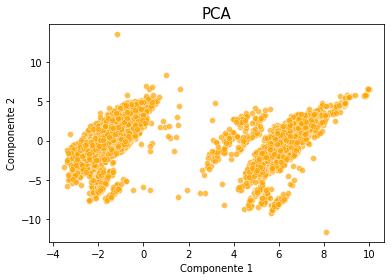

In [33]:
# Realizamos el primer modelo PCA con todos los componentes

data_num_PCA = data_num_norm.drop(columns ='Price')

pca = PCA(n_components = 176, whiten=False, random_state=random_num)
data_PCA = pca.fit_transform(data_num_PCA)
sns.scatterplot(data_PCA[:,0], data_PCA[:,1],
                color='orange',alpha=0.7)

plt.xlabel("Componente 1", fontsize = 10)
plt.ylabel("Componente 2", fontsize = 10)
plt.title('PCA', fontsize = 15)


In [34]:
var = np.cumsum(pca.explained_variance_ratio_)
comps = [i for i,el in enumerate(np.cumsum(pca.explained_variance_ratio_)) if el > 0.85][0]
print(comps)

119


Vemos que 119 componentes explican el 85% de la varianza y por tanto será suficiente quedarnos con 119 en lugar de 176. A continuación realizamos otro PCA únicamente con 119 componentes. 

In [35]:
pca = PCA(n_components = comps, whiten=False, random_state=random_num)
data_PCA = pca.fit_transform(data_num_PCA)

In [36]:
#Variables principales del primer componente

main_variables = sorted([(abs(el),i) for i,el in enumerate(pca.components_[0])], reverse=True)
print(main_variables[:8])
[data_num_norm.columns[i] for n,i in main_variables[:8]]

[(0.2929771762335126, 31), (0.2928704131409173, 29), (0.2927629617077166, 28), (0.29269362681402356, 30), (0.29259951680603796, 33), (0.29259924205115606, 32), (0.2925697201002037, 27), (0.28922683519187503, 26)]


['Review_Scores_Checkin',
 'Review_Scores_Accuracy',
 'Review_Scores_Rating',
 'Review_Scores_Cleanliness',
 'Review_Scores_Location',
 'Review_Scores_Communication',
 'Last_Review',
 'First_Review']

Hemos comprobado que las ocho variables principales del primer componente son las relacionadas con las puntuaciones de las reseñas, siendo estas 'Review_Scores_Checkin', 'Review_Scores_Accuracy', 'Review_Scores_Rating', 'Review_Scores_Cleanliness', 'Review_Scores_Location', 'Review_Scores_Communication', 'Last_Review' y 'First_Review'. Estas explican respectivamente el 29.29%, 29.28%, 29.27%, 29.26%, 29.25%, 29.25%, 29.25% y 28.29% de la varianza respectivamente. En el heatmap que se ha obtenido anteriormente, hemos podido comprobar que todas estas variables están altamente correlacionadas entre sí. 

In [37]:
reverse = pca.inverse_transform(data_PCA)

data_nump = data_num_PCA.to_numpy()

error = (data_num_PCA - reverse)**2

score = np.sum(error,1)
score_mean = np.mean(score)
score_std = np.std(score)
outliers = np.where(score> score_mean + 6*score_std)

Text(0, 0.5, 'Componente 2')

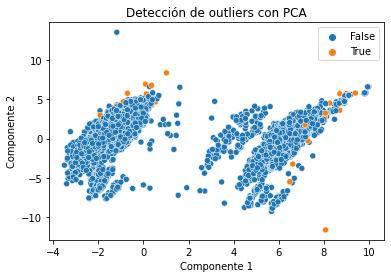

In [38]:
mark_outlier = np.where(score> score_mean + 6*score_std, True, False)
sns.scatterplot(data_PCA[:,0], data_PCA[:,1], hue=mark_outlier)
plt.title('Detección de outliers con PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

In [39]:
sumoutliers=np.sum(mark_outlier)
print("Total de outliers en la base de datos detectados con PCA:", sumoutliers)

Total de outliers en la base de datos detectados con PCA: 48


Hemos obtenido el gráfico PCA con los valores atípicos en color naranja. Para ello, hemos creado una variable llamada mark_outlier donde se generan los outliers y que cuando detecta un outlier indica que es "False" y cuando no lo hay se indica que es "True". Después creamos un diagrama de puntos con sns.scatterplot y insertamos la nueva variable creada mark_outlier dentro de hue para así indicar en un color distinto los outliers y en la leyenda aparezca cuales son los outliers (False). Estos 48 valores atípicos convendría quitarlos o examinarlos ya que podrían afectar nuestro estudio. Podemos observar que hay algún dato que esta alejado y que podría parecer un valor atípico pero lo es y no aparece de otro color porque estamos representando únicamente dos dimensiones, y pueden haber muchas más. Además, algunos datos atípicos podrían estar solapados.

## **Entrnamiento de Modelos**

### Train-Test Split

In [40]:
data_train, data_test = train_test_split(data_num, test_size = 0.3, random_state = random_num)


In [41]:
scaler = StandardScaler()
train_scaler = scaler.fit(data_train)

data_train_norm = pd.DataFrame(index=data_train.index,
                               columns=data_train.columns,
                               data=train_scaler.transform(data_train))

data_test_norm = pd.DataFrame(index=data_test.index,
                               columns=data_test.columns,
                               data=train_scaler.transform(data_test))

Tras dividir el conjunto de datos en train y test, hemos normalizado el conjunto de entrenamiento y de test que serán utilizados si el algoritmo lo requiere. Para realizar la normalización hemos utilizado la función de StandardScaler(). Primero lo hemos ajustado al conjunto de entrenamiento, y después al conjunto de test utilizando el Scaler que estaba entrenado con el data train.

In [42]:
columns = ['pca_comp_%i' % i for i in range(comps)]
df_pca  = pd.DataFrame(data_PCA, columns=columns, index=data_num_PCA.index)

In [43]:
df_pca['Price'] = data_num['Price']

In [44]:
data_train_pca, data_test_pca = train_test_split(df_pca, test_size = 0.3, random_state = random_num)

In [45]:
X_train = data_train.drop(columns='Price')
X_train_norm = data_train_norm.drop(columns='Price')
Y_train = data_train['Price']
Y_train_norm = data_train_norm['Price']

X_test = data_test.drop(columns='Price')
X_test_norm = data_test_norm.drop(columns='Price')
Y_test = data_test['Price']
Y_test_norm = data_test_norm['Price']

X_train_pca = data_train_pca.drop(columns='Price')
Y_train_pca = data_train_pca['Price']
X_test_pca = data_test_pca.drop(columns='Price')
Y_test_pca = data_test_pca['Price']

### Regresión lineal 



Este es el método más básico y trata de modelar la relación entre la variable continua y las demás variables independientes a través del ajuste de una ecuación lineal. En este caso se trata de una regresión lineal múltiple ya que la variable independiente (el precio) tiene una relación lineal con  más de un predictor. Esta regresión nos servirá de listón en nuestro análisis. La regresión lineal puede presentar potenciales problemas en el modelo, como la existencia de outliers y de colinealidad entre los predictores. De momento no realizaremos una optimización para poder ver la capacidad predictiva del modelo y usarlo como benchmark para comparar otros modelos optimizados.

In [46]:
# Creación del modelo

lr = LinearRegression()

# Entrenamos el modelo

lr.fit(X_train_norm, Y_train)

# Información del modelo

lr.score(X_train_norm, Y_train)

print("Coeficiente de determinación:", lr.score(X_train_norm, Y_train))


Coeficiente de determinación: 0.5877992165230118


Obtenemos un coeficiente de determinación de 0.59, lo cual indica que el 59% del precio está explicado por la regresión. 


### Random Forest 

En el caso de un random forest, los hiperparámetros incluyen el número de árboles de decisión y el número de features considerados por cada árbol cuando se divide el nodo. En cada nodo de decisión de cada árbol, se elegirá solo entre un subconjunto de K features o variables tomadas de forma aleatoria de entre todo el conjunto de features.

Crearemos una variable llamada parameters_forest donde fijaremos una lista de parámetros antes de empezar a entrenarlo con los datos. Indicamos una profundidad máxima de crecimiento de cada árbol (max_depth) de 10, 15 o 20 y un número de árboles (n_estimators) de 150, 200 o 250. Usamos solo tres en cada parametro debido a limitaciones de computacion. Nos habria gustado poder hacer una optimizacion mas profunda.

Utilizaremos GridSearchCV para buscar los mejores valores de los parámetros a partir del diccionario de parámetros definida en parameters_xgbm. Esta lista de hiperparámetros la utilizaremos tanto en Ramdom Forest como en XGBOOST para no darle un potecial beneficio a un modelo sobre otro.

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [48]:
parameters_forest = ({'max_depth': [10, 15, 20],
                      'n_estimators': [150, 200, 250]})
# Definimos el modelo

forest_grid = RandomForestRegressor()

# Modelo de Grid Search

clf_forest = GridSearchCV(forest_grid, parameters_forest, n_jobs=4, cv=3)

# Entrenamos el modelo de Grid Search

clf_forest.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [10, 15, 20],
                         'n_estimators': [150, 200, 250]})

 Para obtener los mejores parámetros para nuestro modelo utilizaremos el atributo best_params_ como se muestra a continuación:

In [49]:
clf_forest.best_params_

{'max_depth': 20, 'n_estimators': 250}

Obtenemos que el parámetro de máxima profundidad es 20 y el número de árboles óptimo es 200. 

Tras obtener los hiperparámetros óptimos, volvemos a entrenar el modelo:

In [50]:
forest = RandomForestRegressor(max_depth = clf_forest.best_params_['max_depth'],
                               n_estimators= clf_forest.best_params_['n_estimators'])
forest.fit(X_train, Y_train)
forest.score(X_train, Y_train)
print("Coeficiente de determinación:",forest.score(X_train, Y_train))

Coeficiente de determinación: 0.9521900022941823


Obtenemos un coeficiente de determinación de 0.95, lo cual indica que según el model de Random Forest, el 95% del precio está explicado por el modelo. Esta cifra es muy elevada y quiere decir que este modelo es muy bueno en nuestro caso.

### XGBOOST



XGBoost es una librería de gradient boosting distribuida y optimizada, diseñada para ser altamente eficiente, flexible y portable. Implementa algoritmos de aprendizaje automático bajo el marco del Gradient Boosting. El boosting es una técnica secuencial que funciona según el principio de un emsamblador. Combina un conjunto de aprendices débiles y proporciona una mayor precisión de predicción. Hemos elegido este modelo debido a que en la practica anterior proporciono los mejores resultados.

Para la optimización de los parámetros del modelo utilizaremos Grid Search, como hemos realizado en el método de Random Forest. 

In [51]:
import xgboost as xgb

parameters_xgbm = ({'max_depth': [10, 15, 20],
                    'n_estimators': [150, 200, 250]}) 

# Definimos el modelo

xgbm_grid = xgb.XGBRegressor()

# Modelo de Grid Search

clf_xgbm = GridSearchCV(xgbm_grid, parameters_xgbm, n_jobs=4, cv=3)

# Entrenamos el modelo de Grid Search

clf_xgbm.fit(X_train, Y_train)

[05:39:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, estimator=XGBRegressor(), n_jobs=4,
             param_grid={'max_depth': [10, 15, 20],
                         'n_estimators': [150, 200, 250]})

In [52]:
clf_xgbm.best_params_

{'max_depth': 10, 'n_estimators': 150}

Obtenemos que el parámetro de máxima profundidad es 10 y el número de árboles óptimo es 150. Estos valores son más bajos que en el caso de Random Forest.

In [53]:
xgbm = xgb.XGBRegressor(max_depth = clf_xgbm.best_params_['max_depth'],
                               n_estimators= clf_xgbm.best_params_['n_estimators'])
xgbm.fit(X_train, Y_train)
xgbm.score(X_train, Y_train)

[05:39:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9883296841796421

El score tiene un valor de 0.99 y esto nos indica que XGBOOST es un modelo muy bueno.

### XGBOOST - PCA

In [54]:
xgbm_grid_pca = xgb.XGBRegressor()
clf_xgbm_pca = GridSearchCV(xgbm_grid_pca, parameters_xgbm, n_jobs=4, cv=3)
clf_xgbm_pca.fit(X_train_pca, Y_train_pca)

[06:00:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, estimator=XGBRegressor(), n_jobs=4,
             param_grid={'max_depth': [10, 15, 20],
                         'n_estimators': [150, 200, 250]})

In [55]:
clf_xgbm_pca.best_params_

{'max_depth': 10, 'n_estimators': 250}

In [56]:
xgb_pca = xgb.XGBRegressor(max_depth = clf_xgbm_pca.best_params_['max_depth'],
                               n_estimators= clf_xgbm_pca.best_params_['n_estimators'])
xgb_pca.fit(X_train_pca, Y_train_pca)
xgb_pca.score(X_train_pca, Y_train_pca)

[06:01:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9998792011974106

### Red Neuronal

En la primera línea indicaremos qué formato y cuántos nodos tiene nuestra entrada, llamando a esta variable input. Después iremos enlazando las capas, es decir, la salida de una con la entrada de otra. La capa más popular y la que utilizaremos en este caso será la que usa MLP o Densas ya que conectan todos los nodos de entrada con los de salida. Por un lado, definimos la capa predictiva, por otro la capa dropout para evitar overfitting. Crearemos la capa de salida y llamaremos a esta variable output. Por último crearemos el modelo completo donde indicaremos las entradas y salidas.

In [57]:
import tensorflow as tf

In [58]:
#with tf.device('/device:GPU:0'): #para usar el GPU de Colab
inputs = tf.keras.Input(shape=(X_train_norm.shape[1],))

x = tf.keras.layers.Dense(254, activation="relu")(inputs) #capa predictiva
x = tf.keras.layers.Dropout(0.2)(x) #capa dropout para evitar overfitting
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)

output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs, output)

Procedemos a compliar el modelo creado.
Despues de iterar con varios optimizadores, el mejor resultado lo ha dado el metodo Adam.

In [59]:
model.compile(optimizer='adam', #metodo adam mejor reusltados
              loss=tf.keras.losses.MeanSquaredError(),
             metrics=tf.keras.metrics.RootMeanSquaredError(name='rmse'))

Entrenamos el modelo compilado y lo iteramos con 100 epochs para darle al modelo un numero razonable de iteraciones para encontrar el valle.

In [60]:
model.fit(X_train_norm.to_numpy(),
          Y_train.to_numpy(), 
          epochs=100, 
          validation_data=(X_test_norm.to_numpy(),Y_test.to_numpy()),
          )

Epoch 1/100
291/291 [==============================] - 2s 4ms/step - loss: 2875.2861 - rmse: 53.6217 - val_loss: 3500.7866 - val_rmse: 59.1674
Epoch 2/100
291/291 [==============================] - 1s 4ms/step - loss: 1627.0552 - rmse: 40.3368 - val_loss: 2465.8848 - val_rmse: 49.6577
Epoch 3/100
291/291 [==============================] - 1s 5ms/step - loss: 1505.1875 - rmse: 38.7967 - val_loss: 2462.0007 - val_rmse: 49.6186
Epoch 4/100
291/291 [==============================] - 1s 5ms/step - loss: 1426.4001 - rmse: 37.7677 - val_loss: 2113.9990 - val_rmse: 45.9782
Epoch 5/100
291/291 [==============================] - 1s 4ms/step - loss: 1417.1193 - rmse: 37.6446 - val_loss: 2227.7129 - val_rmse: 47.1987
Epoch 6/100
291/291 [==============================] - 1s 4ms/step - loss: 1384.1973 - rmse: 37.2048 - val_loss: 2282.8030 - val_rmse: 47.7787
Epoch 7/100
291/291 [==============================] - 1s 4ms/step - loss: 1305.4838 - rmse: 36.1315 - val_loss: 2512.7332 - val_rmse: 50.1272

Epoch 53 tiene el minimo valor del val_loss y val_rmse

## **Model Testing**

Una vez optimizados los modeos en entrenamiento, podemos proceder a su comparacion mediante el error cuadratico medio entre la prediccion del data test y los valores reales.

Este paso se ha llevado a cabo una unica vez para evitar el overfitting en test. El menor resultado sera el modelo elegido.

In [61]:
from sklearn.metrics import mean_squared_error, mean_poisson_deviance

In [62]:
rmse_linear = mean_squared_error(y_true = Y_test, y_pred = lr.predict(X_test_norm))
rmse_linear 

6.958922277953067e+24

In [63]:
predicted_forest = forest.predict(X_test)
rmse_forest = mean_squared_error(y_true = Y_test, y_pred = predicted_forest)
rmse_forest

1095.4302592652894

In [64]:
predicted_xgb = xgbm.predict(X_test)
rmse_xgb = mean_squared_error(y_true = Y_test, y_pred = predicted_xgb)
rmse_xgb

1094.2032276247128

In [65]:
predicted_xgb_pca = xgb_pca.predict(X_test_pca)
rmse_xgb_pca = mean_squared_error(y_true = Y_test_pca, y_pred = predicted_xgb_pca)
rmse_xgb_pca

1592.2994928658027

In [66]:
predicted_data_norm = data_test_norm.copy()
predicted_data_norm['Price'] = model.predict(X_test_norm.to_numpy())
predicted_data_unorm = pd.DataFrame(index=predicted_data_norm.index, columns=predicted_data_norm.columns, data=train_scaler.inverse_transform(predicted_data_norm))
predicted_data_unorm['Predicted_Price'] = predicted_data_unorm['Price']
predicted_data_unorm['Price'] = data_test['Price']

rmse_nn = round(np.mean(100*np.sqrt((predicted_data_unorm['Price'] - predicted_data_unorm['Predicted_Price'])**2)/predicted_data_unorm['Price']),2)
rmse_nn

6770.76

# **Conclusión**

Podemos observar en este apartado que el error cuadrático medio más elevado corresponde al método de Regresión Lineal, por lo que podemos afirmar que es el peor modelo para nuestro análisis. Esto era de esperar puesto que es el modelo mas simple y no hemos llevado ninguna optimizacion a cabo.

Por otro lado, el modelo mediante red neuronal nos ha proporcionado un error mucho menor que en el modelo linel pero aun asi ha sido mucho mas elevado que el random forest y xgboost. Podriamos haber añadido mas capas o combinar con diferente numero de nodos o dropout, pero al haber corrido ya el test, seria impropio intentar reajustar el modelo.

En cuanto al xgboost y el random forest, han tenido resultados muy similares despues de una optimizacion de hiperparametros mas extensa, pero el mejor en todas las iteraciones ha sido el xgboost, cuyo resultado es confirmado por el menor error cuadratico medio.

Como nota adicional, hemos entrenado el modelo con un PCA de los datos para observar la perdida de capacidad predictiva al extraer varianza del modelo. Con un PCA que explica un 85% de la varianza, el modelo xgboost gana alrededor de un 50% de error en comparacion a si lo enrenamos con todos los datos. Pero aun asi es mejor que el regressor lineal o la red neuronal.

# Apendice

Hemos utilizado el paquete pickle para guardar los modelos en el disco duro


In [68]:
import pickle

fileforest = '/content/drive/MyDrive/Colab Notebooks/forest_model.sav'
pickle.dump(forest, open(fileforest, 'wb'))
 
filexgb = '/content/drive/MyDrive/Colab Notebooks/xgb_model.sav'
pickle.dump(xgbm, open(filexgb, 'wb'))

filexgb_pca = '/content/drive/MyDrive/Colab Notebooks/xgb_pca_model.sav'
pickle.dump(xgb_pca, open(filexgb_pca, 'wb'))

file_nn = 'nn_model.sav'
pickle.dump(model, open(file_nn, 'wb'))
# some time later...
 
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

INFO:tensorflow:Assets written to: ram://196268d2-9838-4dfc-a31e-e65c5d9b1cf2/assets
